In [53]:
import seaborn as sns
import pandas as pd
from nltk.corpus import stopwords
from collections import Counter
import nltk
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem import SnowballStemmer
import string
import matplotlib.pyplot as plt
nltk.download('stopwords')
punctuation = set(string.punctuation)
stop =stopwords.words("english")
stemmer  = SnowballStemmer("english")

df_train= pd.read_csv(r"D:\NLP Project\dataset\train.csv", on_bad_lines='skip')
df_test = pd.read_csv(r"D:\NLP Project\dataset\test.csv")
df = pd.concat([df_train,df_test])
pd.DataFrame(df[df["Class Index"] == 4]["Description"].head(5))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zainch-032\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Description
78,Reuters - Was absenteeism a little high\on Tue...
79,Reuters - A group of technology companies\incl...
80,Reuters - America Online on Thursday said it\p...
81,Reuters - A group of consumer electronics\make...
82,Reuters - The mystery of what went wrong for t...


# New Section

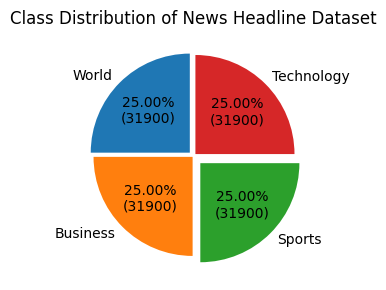

In [54]:
import matplotlib.pyplot as plt

values = df["Class Index"].value_counts().sort_index()

# Labels in order
labels = ["World", "Business", "Sports", "Technology"]

# Explode each slice slightly
explode = [0.05, 0.01, 0.1, 0.03]

# Custom function to show % + actual count
def autopct_format(pct, allvals):
    absolute = int(round(pct/100 * sum(allvals)))
    return f"{pct:.2f}%\n({absolute})"

# Plot
plt.figure(figsize=(5,3))
plt.pie(
    values,
    labels=labels,
    explode=explode,
    autopct=lambda pct: autopct_format(pct, values),
    startangle=90
)

plt.title("Class Distribution of News Headline Dataset")
plt.tight_layout()
plt.show()


In [55]:
def preprocess(value):
    # Convert to lowercase and split into words
    value = value.lower().split()

    # Keep only alphanumeric words
    value = [word for word in value if word.isalnum()]

    # Remove stopwords and punctuation
    value = [word for word in value if word not in stop and word not in punctuation]

    # Apply stemming to each word
    value = [stemmer.stem(word) for word in value]

    return " ".join(value)

In [56]:
df['Description_processed'] = df['Description'].apply(preprocess)

C:\Users\Zainch-032\AppData\Local\Temp\ipykernel_13652\274476301.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_common, x='Word', y='Count',palette='viridis')


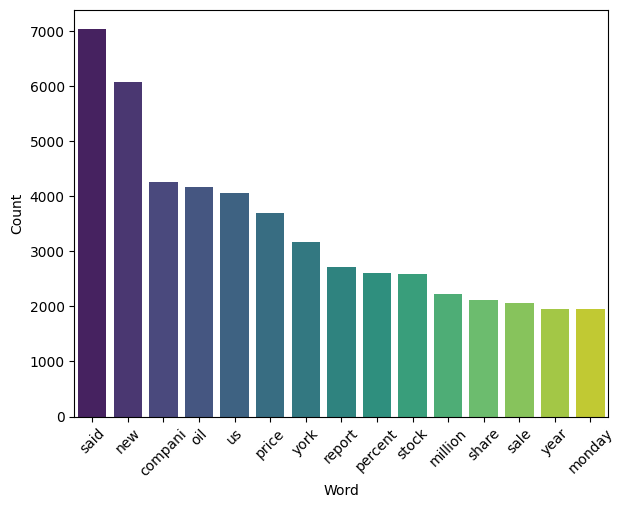

In [57]:

l =[]
for msg  in df[df["Class Index"]==3]["Description_processed"].tolist():
    for word in msg.split():
        l.append(word)

most_common = Counter(l).most_common(15)
df_common = pd.DataFrame(most_common, columns=['Word', 'Count'])

sns.barplot(data=df_common, x='Word', y='Count',palette='viridis')
plt.tight_layout()
plt.xticks(rotation= 45)
plt.show()

C:\Users\Zainch-032\AppData\Local\Temp\ipykernel_13652\3671256971.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_common, x='Word', y='Count',palette='viridis')


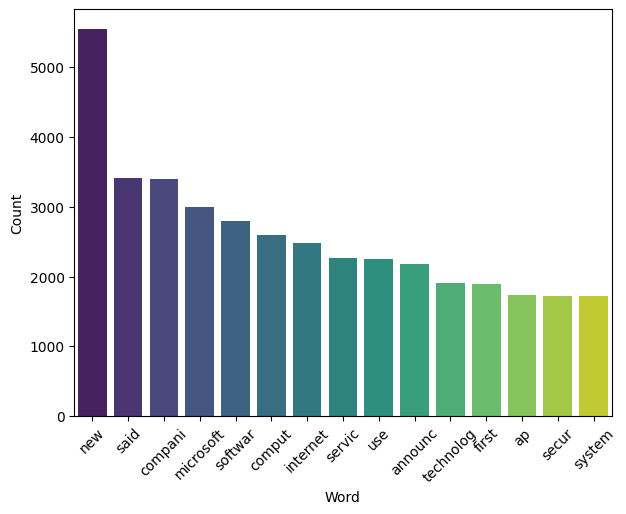

In [58]:
l.clear()
l =[]
for msg  in df[df["Class Index"]==4]["Description_processed"].tolist():
    for word in msg.split():
        l.append(word)

most_common = Counter(l).most_common(15)
df_common = pd.DataFrame(most_common, columns=['Word', 'Count'])

sns.barplot(data=df_common, x='Word', y='Count',palette='viridis')
plt.tight_layout()
plt.xticks(rotation= 45)
plt.show()

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform your processed text
X= tfidf_vectorizer.fit_transform(df["Description_processed"]).toarray()

In [60]:

y = df["Class Index"]
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(type(X_train))
print(X_train.shape)

print(type(X_test))
print(X_test.shape)


<class 'numpy.ndarray'>
(102080, 5000)
<class 'numpy.ndarray'>
(25520, 5000)


In [61]:

from sklearn.metrics import accuracy_score,f1_score

from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB
from sklearn.ensemble import ExtraTreesClassifier



# 🚀 OPTIMIZED CLASSIFIERS FOR 100K SAMPLES × 5000 FEATURES
models = {
    # ⚡ LIGHTNING FAST (Seconds to few minutes)
    "Complement_NB": ComplementNB(),
    "Multinomial_NB": MultinomialNB(),
    "Bernoulli_NB": BernoulliNB(),
    "Perceptron": Perceptron(max_iter=1000, n_jobs=-1, tol=1e-3),
    "Linear_SVC": LinearSVC(max_iter=1000, dual=False, tol=1e-3),
    "Ridge": RidgeClassifier(tol=1e-3),
    "Logistic_Regression": LogisticRegression(max_iter=1000, n_jobs=-1, tol=1e-3),
    "SGD_Log": SGDClassifier(loss="log_loss", max_iter=1000, n_jobs=-1, tol=1e-3)}


def classifier(clf,X_train,X_test,y_train,y_test):

        clf.fit(X_train,y_train)
        y_pred  = clf.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        F1_score  = f1_score(y_test,y_pred,average='weighted')

        return accuracy,F1_score


acc  = []
f1 = []
for name,model in models.items():
    accuracy,F1 = classifier(model,X_train,X_test,y_train,y_test)
    print("Name",name)
    print("Accuracy" , accuracy)
    acc.append(accuracy)
    f1.append(F1)


performance = pd.DataFrame({"Algorithm":models.keys(),"Accuracy":acc,"F1_Score":f1})

Name Complement_NB
Accuracy 0.8722962382445141
Name Multinomial_NB
Accuracy 0.8755877742946708
Name Bernoulli_NB
Accuracy 0.8760579937304075
Name Perceptron
Accuracy 0.8436128526645768
Name Linear_SVC
Accuracy 0.8862460815047022
Name Ridge
Accuracy 0.8858150470219436
Name Logistic_Regression
Accuracy 0.8847962382445141
Name SGD_Log
Accuracy 0.8736677115987461


In [62]:
performance

,Algorithm,Accuracy,F1_Score
0,Complement_NB,0.872296,0.871334
1,Multinomial_NB,0.875588,0.875301
2,Bernoulli_NB,0.876058,0.875740
3,Perceptron,0.843613,0.844127
4,Linear_SVC,0.886246,0.886044
5,Ridge,0.885815,0.885524
6,Logistic_Regression,0.884796,0.884634
7,SGD_Log,0.873668,0.873126


In [63]:
from sklearn.metrics import precision_score,confusion_matrix,classification_report
linear_svc =  LinearSVC(max_iter=1000, dual=False, tol=1e-3)
linear_svc.fit(X_train,y_train)
pred  = linear_svc.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,pred))
print("Precison score : ",precision_score(y_test,pred,average="weighted"))
print("Classification report :")


Accuracy :  0.8862460815047022
Precison score :  0.8861001863361999
Classification report :


In [64]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.91      0.87      0.89      6283
           2       0.94      0.96      0.95      6466
           3       0.85      0.85      0.85      6370
           4       0.85      0.86      0.86      6401

    accuracy                           0.89     25520
   macro avg       0.89      0.89      0.89     25520
weighted avg       0.89      0.89      0.89     25520



<Axes: >

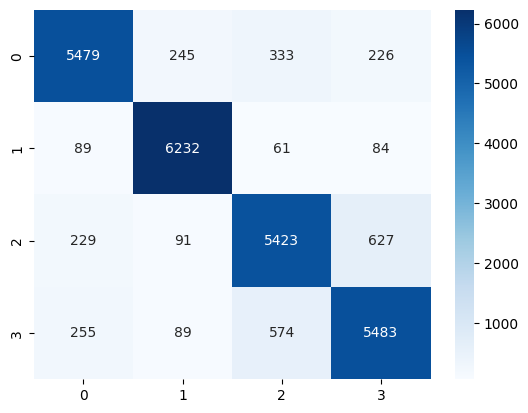

In [65]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d', cmap='Blues')

In [93]:
import pickle


pickle.dump(linear_svc, open("../app/model/Linear_SVC.pkl", "wb"))
pickle.dump(tfidf_vectorizer, open("../app/model/Tfidf.pkl", "wb"))
